
************************************************************************ 

Programer: XXXX XXXX
Group Name: XXXX 
Program : XXXX 
Image Processing,PS
Winter 2017

************************************************************************ 


 H_avg Matrix is : 


  [[ 0.56391157  0.56291755  0.55951675  0.55952369  0.54588886  0.5168129
   0.56007321  0.56161279  0.55319463  0.56002712  0.56320892  0.56310138
   0.56368949  0.56460508  0.56466607  0.56282305]
 [ 0.56652183  0.56505351  0.56468518  0.564791    0.57287688  0.56423912
   0.5645338   0.563463    0.56416923  0.56432593  0.56662819  0.56506977
   0.56683963  0.56667783  0.56823687  0.56828499]
 [ 0.56690388  0.56542291  0.56436245  0.56449907  0.56385361  0.56346858
   0.56267491  0.56270003  0.56331133  0.56324173  0.56301411  0.56335147
   0.56402378  0.56394784  0.5652898   0.56543098]
 [ 0.55825189  0.55694972  0.55588805  0.55527437  0.55423708  0.5540625
   0.55780962  0.55333864  0.55404716  0.55423794  0.55478999  0.55

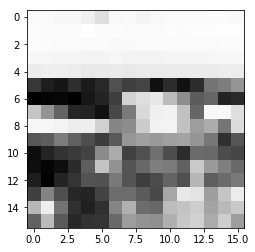

In [147]:
# Exercise 1.2 (5 points)

# Write a Python function avg_H_per_block which takes, as input, a filename of an RGB image as well as a tuple (N,M)
# that specifies a block size. The function should first convert the image to HSV color space and then partition the
# image into blocks of size N x M pixel. For each block, the average value of the H channel should be computed.
# The function should return a numpy array of dimensions X x Y which holds, at the (i,j)-th position, the avgerage
# H channel value of the (i,j)-th block. E.g.,


import numpy as np
import scipy
from scipy.misc import imread, imsave, imresize
import skimage
from skimage import data
from matplotlib import pyplot as plt
from skimage.util.shape import view_as_blocks
from skimage.transform import rescale, resize, downscale_local_mean


#************************************Function SECTION************************************   
def avg_H(image_file, (M,N)):
 
    img =imread(image_file)
   
    #print 'HSV image'
    img_hsv=skimage.color.rgb2hsv(img)

    #print 'H image'
    img_h= img_hsv[:,:,0]

    resized_img_h=skimage.transform.resize(img_h,(256,256))

    # print resized_img_h
    # plt.imshow(resized_img_h) 
    # plt.show()

    sub_Block = view_as_blocks(resized_img_h, block_shape=(M,N))

    avg_H_val=np.zeros((M, N))
    i=0
    j=0
    for i in range(0,M):
        for j in range(0,N):
            #print '\n Avg value of sub block [%d][%d] : %.19f '% (i,j,np.mean(sub_Block[i][j]))
            avg_H_val[i,j]=np.mean(sub_Block[i][j])
 
    return avg_H_val



#************************************TEST SECTION************************************         


#img =imread('C:\ProgramData\image\beach.jpg')
image='beach.jpg'
H_avg = avg_H(image, (16,16))

print '\n************************************************************************ \n'  

print 'Programer: XXXX XXXX'
print 'Group Name: XXXX '
print 'Program : XXXX '
print 'Image Processing,PS'
print 'Winter 2017'

print '\n************************************************************************ \n'     
print "\n H_avg Matrix is : \n\n\n ", H_avg
print '\n ************************************************************************ \n'     
  
print "\n plotted H_Avg is : \n "


plt.imshow(H_avg, cmap='gray')
plt.show()


